In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import sqlite3

In [7]:
con= sqlite3.connect(r'C:\Users\USER\Downloads\Amazon data\database.sqlite')

In [8]:
type(con)

sqlite3.Connection

In [9]:
df= pd.read_sql_query('SELECT* FROM Reviews',con)

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df.shape

(568454, 10)

In [9]:
#Statement 1 - Perform Sentiment Analysis on Data
#Perform EDA for positive sentences

# with refernce to the summary column in data we have to perform sentiment analysis

In [10]:
#install TextBlob package

In [12]:
from textblob import TextBlob

In [13]:
text_summary0= df['Summary'][0]
text_summary0

'Good Quality Dog Food'

In [14]:
TextBlob(text_summary0).sentiment.polarity     #polarity means if its neagative, positive,0(neautral sentiment) etc

0.7

In [15]:
#making blank list of polarity i.e whatever polarity i get with respect to the summary, it will be stores in this list.
#append - whatever polarity i will get,it will append in polarity list.
#This append method is widely used either to add a single item to the end of a list or to populate a list using a for loop.
#Using except to deal with missing values, there it will append 0

polarity=[]

for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [16]:
polarity

[0.7,
 0.0,
 0.0,
 0.0,
 0.8,
 0.6,
 0.35833333333333334,
 1.0,
 0.0,
 0.5,
 0.625,
 0.3333333333333333,
 0.13636363636363635,
 0.375,
 0.0,
 0.0,
 -0.4,
 0.625,
 0.61875,
 0.0,
 0.3,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.8,
 0.0,
 0.625,
 1.0,
 0.0,
 0.5,
 0.35,
 0.4,
 0.5,
 0.640625,
 0.0,
 0.7,
 0.5,
 1.0,
 0.0,
 0.0,
 0.475,
 0.8,
 0.0,
 0.7,
 0.0,
 0.45499999999999996,
 0.0,
 0.0,
 0.4375,
 0.0,
 0.0,
 0.4,
 0.625,
 1.0,
 -0.625,
 0.875,
 0.8,
 0.5,
 -0.125,
 -0.5,
 0.0,
 0.8,
 0.8,
 0.0,
 0.7,
 0.2,
 0.0,
 1.0,
 -0.0625,
 1.0,
 0.0,
 0.35714285714285715,
 0.0,
 0.7,
 0.8,
 -0.3,
 1.0,
 1.0,
 0.8,
 0.0,
 0.1,
 0.0,
 1.0,
 0.8,
 1.0,
 0.625,
 0.8,
 0.45,
 0.8,
 0.7,
 1.0,
 0.0,
 0.6,
 0.8,
 0.4666666666666666,
 0.5,
 -0.6999999999999998,
 0.7,
 0.8,
 0.0,
 0.0,
 0.7,
 1.0,
 -0.6,
 0.0,
 0.0,
 0.7,
 0.0,
 1.0,
 -0.2,
 0.688888888888889,
 0.0,
 1.0,
 0.8,
 0.375,
 0.39999999999999997,
 1.0,
 0.8,
 0.6041666666666666,
 0.7,
 0.5,
 0.5625,
 1.0,
 0.0,
 0.21250000000000005,
 0.5,
 0.0

In [17]:
len(polarity)

568454

In [18]:
data= df.copy()

In [19]:
data['Polarity']=polarity

In [20]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.70
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.00
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.00
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.00
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.80
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.00
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-0.75
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.00
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.50


In [20]:
#Perform EDA for positive sentences

#with refernce to the text column in data we have to perform EDA for positive sentiments(i.e polarity >0)

In [21]:
#filter the data with polarity >0 in our dataframe 'data' and store the filter in data_positive

data_positive= data[data['Polarity']>0]

In [22]:
data_positive.shape

(331665, 11)

In [23]:
#to extract popular keywords from huge chunks of data, use wordcloud
#Here in this data from the summary column, we have to figure out what are those key words on which user is going to focus on
#install wordcloud

In [23]:
from wordcloud import WordCloud, STOPWORDS    #stopwords are he,she,it,they,them,his,him since they makes no sense in our analysis

In [24]:
stopwords= set(STOPWORDS)    #unique stopwords in a set

In [25]:
data_positive.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.700000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.800000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.600000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.358333
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1.000000


In [26]:
#To get entire data of summary column, we had to join this column

total_text=(''.join(data_positive['Summary']))


In [27]:
len(total_text)

8133348

In [28]:
total_text[0:10000]

'Good Quality Dog FoodGreat taffyNice TaffyGreat!  Just as good as the expensive brands!Wonderful, tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this "diet" food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy!Love it!GREAT SWEET CANDY!Always freshDelicious product!Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine!Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry!satisfyingLove Gluten Free Oatmeal!!!GOOD WAY TO START THE DAY....Wife\'s favorite BreakfastWhy wouldn\'t you buy oatmeal from Mcanns? Tastes great!Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won\'t order the Variety PackHOT!  And good!  Came back for more  :)Roasts up a smooth brewOur guests love it!Awesome Deal!Awsome - Kids in neighborhood loved us!great deal.Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good.How much would you

In [29]:
#Whenever we have to deal(clean or modify) with text data, we have to import regular expression module
# sub - substitute

import re
total_text= re.sub('[^a-zA-Z]',' ',total_text)

In [30]:
total_text[0:10000]

'Good Quality Dog FoodGreat taffyNice TaffyGreat   Just as good as the expensive brands Wonderful  tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this  diet  food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy Love it GREAT SWEET CANDY Always freshDelicious product Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry satisfyingLove Gluten Free Oatmeal   GOOD WAY TO START THE DAY    Wife s favorite BreakfastWhy wouldn t you buy oatmeal from Mcanns  Tastes great Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won t order the Variety PackHOT   And good   Came back for more    Roasts up a smooth brewOur guests love it Awesome Deal Awsome   Kids in neighborhood loved us great deal Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good How much would you pa

In [32]:
total_text= re.sub(' +',' ',total_text)

In [33]:
total_text[0:10000]

'Good Quality Dog FoodGreat taffyNice TaffyGreat Just as good as the expensive brands Wonderful tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this diet food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy Love it GREAT SWEET CANDY Always freshDelicious product Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry satisfyingLove Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite BreakfastWhy wouldn t you buy oatmeal from Mcanns Tastes great Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won t order the Variety PackHOT And good Came back for more Roasts up a smooth brewOur guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good How much would you pay for a bag of choco

(-0.5, 999.5, 499.5, -0.5)

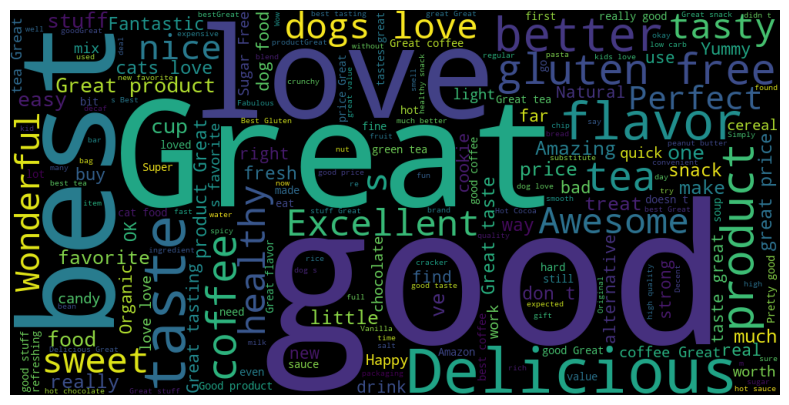

In [34]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#generate will generate the wordcloud of the total_text

---

In [35]:
#Perform EDA for negative sentences.

In [35]:
data_negative= data[data['Polarity']<0]

In [36]:
total_text2= (''.join(data_negative['Summary']))

In [37]:
total_text2= re.sub('[^a-zA-Z]',' ',total_text2)

In [38]:
total_text2

'poor tasteNasty No flavorHow can you go wrong pretty expensivestale product Bigger then other brandsOrder only in cold weatherBaddisappointingMy every day green teaBROKEN BOTTLE BOTTOMS Tasteless but low calorieMarley s Mellow Mood Lite   Half Tea Half LemonadeNearly killed the catsCHANGED FORMULA MAKES CATS SICK    Not a real teaMcclures bloody Mary mixNot GoodEukanuba puppy small breed dog foodMy everyday cup of TeaDisappointedSad outcomeDon t Waste Your MoneyDisappointed sugar in the rawGood product but terrible agricultural practicesSugar in the rawSugar in the rawtoo expensiveNot sureSo awful I can barely describeAWFULBitterA saving grace for Green Mountain Coffee   Fantastic Chicken Noodle soupHeinz no more DisappointingWaste of moneyHam BaseMSG Ham BaseLove the product disappointed in the shipping poor item packagingAwfuldisappointingHarda slight taste of jalapenoHeavy on the VinegarThese chips make me weak at the kneesNot bad but a little hard to get used toFirm quality chipNo

In [39]:
total_text2= re.sub(' +',' ',total_text2)

(-0.5, 999.5, 499.5, -0.5)

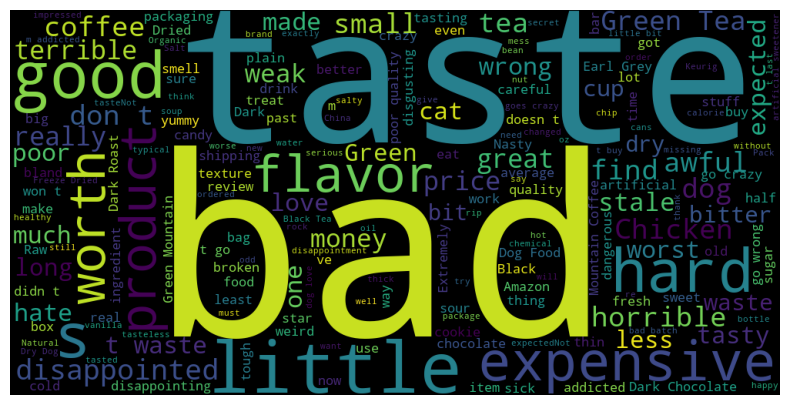

In [40]:
wordcloud2=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud2)
plt.axis('off')

---

In [43]:
#Problem- Analyse as to what type of users, Amazon can recommend more product

In [41]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [42]:
df['UserId'].nunique()

256059

In [43]:
df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'})

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [44]:
raw=df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)

In [45]:
raw

,Summary,Text,Score,ProductId
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [4]:
#to assign own column names

raw.columns=['Number_of_summaries','Number_of_text','Mean_score','No_of_product_purchased']
raw

NameError: name 'raw' is not defined

In [75]:
#From the above data, we only need top 10 users
user_10= raw.index[0:10]
user_10

Index(['A3OXHLG6DIBRW8', 'A1YUL9PCJR3JTY', 'AY12DBB0U420B', 'A281NPSIMI1C2R',
       'A1Z54EM24Y40LL', 'A1TMAVN4CEM8U8', 'A2MUGFV2TDQ47K', 'A3TVZM3ZIXG8YW',
       'A3PJZ8TU8FDQ1K', 'AQQLWCMRNDFGI'],
      dtype='object', name='UserId')

In [3]:
number_10= raw['No_of_product_purchased'][0:10]
number_10

NameError: name 'raw' is not defined

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'A3OXHLG6DIBRW8'),
  Text(1, 0, 'A1YUL9PCJR3JTY'),
  Text(2, 0, 'AY12DBB0U420B'),
  Text(3, 0, 'A281NPSIMI1C2R'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A1TMAVN4CEM8U8'),
  Text(6, 0, 'A2MUGFV2TDQ47K'),
  Text(7, 0, 'A3TVZM3ZIXG8YW'),
  Text(8, 0, 'A3PJZ8TU8FDQ1K'),
  Text(9, 0, 'AQQLWCMRNDFGI')])

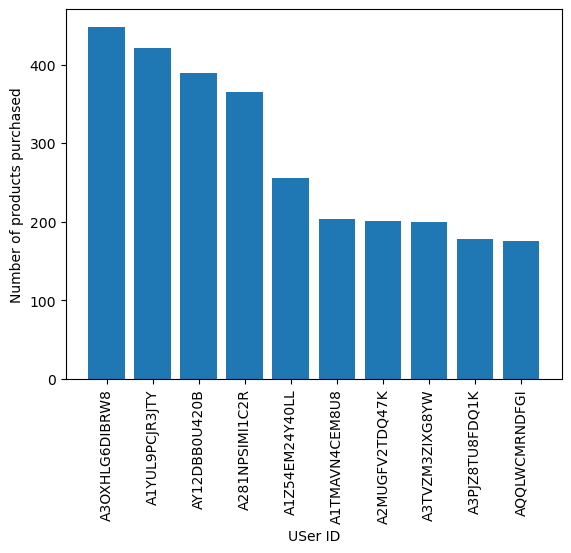

In [78]:
plt.bar(user_10, number_10,label='most recommended users')
plt.xlabel('USer ID')
plt.ylabel('Number of products purchased')
plt.xticks(rotation='vertical')

In [ ]:
#Inference:
#We can recommend more and more products to these user ID as there is a high probability that these users will buy those products.

---

In [ ]:
#Analyse length of comments whether Customers are going to give lengthy comments or short ones

In [240]:
df.sample(n=2000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
201332,201333,B000GW46DE,A5XGP2YYCGMTX,"Robert Brock ""MrMom""",1,2,4,1174435200,Flavor/yes price /Hmmmm,I'll give Jack Links 4.5 stars on flavor and q...
155362,155363,B000GAT6NG,ADYJCTSYK18AQ,"Charles J. Elmore III ""C Money""",0,0,5,1265932800,Coconut Oil is great!,This coconut oil is fantastic for all my culin...
80235,80236,B002C58RXI,A2K6B8JKVTVF6T,"Beryl ""rainbobird""",0,0,5,1343088000,Love this coffee!,Community coffee is the best brand of coffee m...
441220,441221,B000EVQWKC,A3O9N63VC1O6EH,"Gummi Addict ""Sue""",6,6,5,1256688000,OMG! The taste is fantastic - but wait two hou...,The Haribo Sugarless Gummi Bears I bought (the...
474585,474586,B0006VB3W2,A19MXYAHMAC99A,Daniel F. Bowen,12,15,1,1292112000,Solid God Katz-N-Flocken Dry Cat Food,I ordered this discounted food knowing the dis...
...,...,...,...,...,...,...,...,...,...,...
282574,282575,B001EO5WZ4,AGMAH717O145R,awaykate,0,0,5,1334793600,Delicious and Easy,Twinings makes some of the best black tea (ear...
144501,144502,B0053QF9JI,AOEFXI6NC48E9,Michael,0,0,5,1332288000,BEST ROOT BEER AROUND....HATE THE NEW DESIGN O...,This is the best root beer around. Has a bite...
413253,413254,B006U1XCAI,AGT3X9A2TKP80,marys,0,0,4,1295049600,Sugar Free Gumballs,"These gumballs were fine, but QUITE spendy in ..."
15645,15646,B000255OIG,A2LN4UD395G2B6,Chwychuro,0,0,5,1320192000,Great Treat,This is great! The price is better than any st...


In [241]:
final=df[0:2000]

In [242]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [86]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [88]:
final.duplicated().sum()

0

In [243]:
final['Text'][0].split(' ')

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [91]:
len(final['Text'][0].split(' '))

49

In [100]:
def calc_len(text):
    return len(text.split(' '))

In [244]:
final['Text_length']= final['Text'].apply(calc_len)

C:\Users\USER\AppData\Local\Temp\ipykernel_11268\2548620528.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [245]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30


In [102]:
import plotly.express as px

In [95]:
px.box(final,y='Text_length')

In [63]:
#Inference:
#50% users will give reviews of 50 words length and few people will give lengthy reviews.

---

In [64]:
#Analyzing Score

<Axes: ylabel='count'>

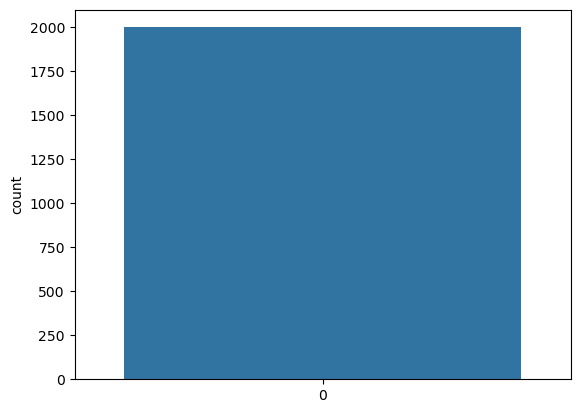

In [108]:
sns.countplot(final['Score'])

---

In [109]:
#Analyzing behaviour of customer

In [246]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30


In [226]:
final['Text'][0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.'

In [247]:
#convert all words in lower case because lets pick a word 'dog', if at one place it is Dog and other place it is dog then
#it will have impact on result.

final['Text']= final['Text'].str.lower()

C:\Users\USER\AppData\Local\Temp\ipykernel_11268\2130722192.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [227]:
final['Text'][164]

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [115]:
import re
re.sub('[^a-zA-Z]',' ', final['Text'][164])

#after executing the command we see that 100 is removed, this is not a correct representation.

'seriously this product was as tasteless as they come  there are much better tasting products out there but at     calories its better than a special k bar or cookie snack pack  you just have to season it or combine it with something else to share the flavor '

In [229]:
#using own logic to correct it.

punctuations='''!@#$%&()-{}[]<>?/\,._'''

no_punc=''

line_data= final['Text'][45]
for char in line_data:
    if char not in punctuations:
        no_punc= no_punc + char
no_punc



"this seems a little more wholesome than some of the supermarket brands but it is somewhat mushy and doesn't have quite as much flavor either  it didn't pass muster with my kids so i probably won't buy it again"

In [233]:
import string
punctuations= string.punctuation

def remove_punc(review):
    no_punc=''
    for char in review:
        if char not in punctuations:
            no_punc= no_punc + char
    return no_punc


In [248]:
final['Text']= final['Text'].apply(remove_punc)   #applying above function on text feature.

C:\Users\USER\AppData\Local\Temp\ipykernel_11268\2529465029.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [249]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...,30


In [250]:
line_data=final['Text'][45]
line_data

'this seems a little more wholesome than some of the supermarket brands but it is somewhat mushy and doesnt have quite as much flavor either  it didnt pass muster with my kids so i probably wont buy it again'

In [201]:
final['Text'][0]

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor'

In [122]:
#removing more stopwords like was, as,you,it,or, they, are

In [163]:
import nltk                       #(nature language tool kit)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [164]:
from nltk.corpus import stopwords

In [150]:
#[word for word in data.split(' ') if word not in set(stopwords.words('english'))]   #we need stopwords of english language

['seriously',
 'product',
 'tasteless',
 'come',
 'much',
 'better',
 'tasting',
 'products',
 '100',
 'calories',
 'better',
 'special',
 'k',
 'bar',
 'cookie',
 'snack',
 'pack',
 'season',
 'combine',
 'something',
 'else',
 'share',
 'flavor']

In [165]:
re= [word for word in line_data.split(' ') if word not in set(stopwords.words('english'))]   #concatinate the above words

#defining a blank list
str= ' '
for wd in re:
    str= str+wd
    str= str+' '
str



' seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor '

In [198]:
#applying above function on whole text

def remove_stopwords(review):
    return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])


In [251]:
final['Text']=final['Text'].apply(remove_stopwords)

C:\Users\USER\AppData\Local\Temp\ipykernel_11268\2463611171.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [252]:
final['Text'][45]

'seems little wholesome supermarket brands somewhat mushy doesnt quite much flavor either  didnt pass muster kids probably wont buy'

In [253]:
final['Text'][:]

0       bought several vitality canned dog food produc...
1       product arrived labeled jumbo salted peanutsth...
2       confection around centuries  light pillowy cit...
3       looking secret ingredient robitussin believe f...
4       great taffy great price  wide assortment yummy...
                              ...                        
1995    laugh reviews said much work  add egg  little ...
1996    read favorable reviews pancake mix amazon quit...
1997    expecting great things based reviews good grea...
1998    love pancake mix  bought first whole foods mar...
1999    say  wonderful highlight weekend  ohhhhhh   us...
Name: Text, Length: 2000, dtype: object